# Prosper Loan Analysis
## by Likhith J Gunjal

## Preliminary Wrangling

> The Propser loan dataset is a dataset of loans borrowed by people across the US. It contains many features (81) which include, interest rates, loan status, the borrower geographic state, etc. it consists of 113937 records. We try to explore this dataset with visualization using matplotlib and seaborn packages.

In [495]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Rows, Columns  : (113937, 29)


Text(0.5, 1.0, 'Nulls in each column')

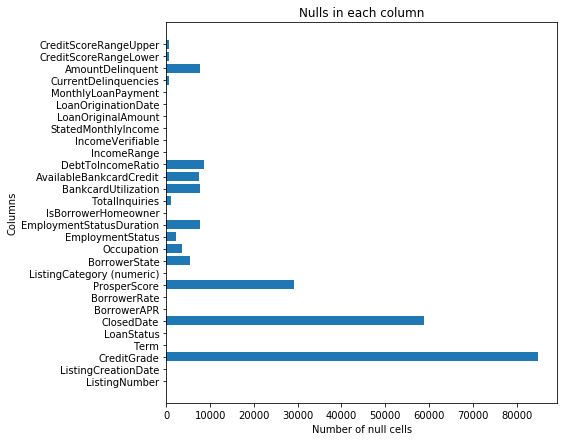

In [499]:
df=pd.read_csv('prosperLoanData.csv')
df.head()
df.shape
df1=df.iloc[:,np.r_[1:9,15:22,34,41,42,46:50,63,64,67,35,36,25,26]] #choosing columns/features for our analysis
print('Rows, Columns  :',df1.shape) #Finding the number of columns and rows in our chosen subset of data

nulls=[]

#creating list of number of null values in each column in the dataset
for col in df1.columns:
    nulls.append(df1[col].isna().sum())#
plt.figure(figsize=(7,7))
plt.barh(df1.columns,nulls)
plt.xlabel('Number of null cells')
plt.ylabel('Columns')
plt.title('Nulls in each column')

> Columns 'ClosedDate' and 'CreditGrade' contain lot of null values, hence I will drop these columns from my dataset. The remaining columns will be individually examined for null values and appropriately dealt with.
Thus the dataframe will contain 27 columns and 113937 rows.

In [500]:
df1.drop(['ClosedDate', 'CreditGrade'],axis=1,inplace=True) #dropping columns 'ClosedDate' and 'CreditGrade'
print('(Rows,Columns) :',df1.shape) #counting columns and rows in the final dataset

(Rows,Columns) : (113937, 27)


>  The Dataset has 81 columns and 113937 records of which i have chosen 27 columns for my analysis. As such only these variables will be considered in my analysis. 

> I will analyze two main features here. 1.) Loan Defaults 2.) Borrower's Interest rate and APR

>  Listing category, IncomeRange, Verifiable Income, Debt to Income Ratio Credit Rating and many more of the features in the dataframe df1 will be explored for relationships

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> ## Loan Term Distribution

Text(0.5, 1.0, 'Loan Term Distribution (relative frequency)')

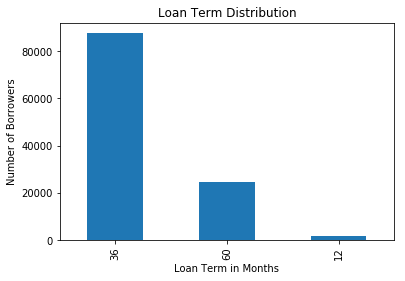

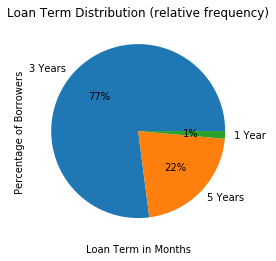

In [306]:
term_dist=plt.figure(1)
df1['Term'].value_counts().plot(kind='bar') # Counting Borrowers in each term category
plt.xlabel('Loan Term in Months') #x axis labeling
plt.ylabel('Number of Borrowers') #y- axis labeling
plt.title('Loan Term Distribution') # PLot title
term_prct_dist=plt.figure(2)
labels=['3 Years','5 Years','1 Year'] #creating labels for bar plot
(100*df1['Term'].value_counts()/df1['ListingNumber'].count()).plot(kind='pie',labels=labels,autopct='%.0f%%') # Pie chart for Loan term distribution
plt.xlabel('Loan Term in Months')
plt.ylabel('Percentage of Borrowers')
plt.title('Loan Term Distribution (relative frequency)')

> The above bar chart of distribution of Loan term tells us about the number of people in each of the term categories. There are only 3 different loan terms in our dataset. 12 Months, 36 Months and 60 Months. As we can see from the above chart, it is clear that most people (77%) go for the 36 month term and about 22% go for the 60 month term and about 1% go for the 12 month term.

> ## Number of Borrowers by State

,BorrowerState
CA,13.573813
TX,6.310527
NY,6.206305
FL,6.198004
IL,5.461069
GA,4.618989
OH,3.870986
MI,3.313903
VA,3.023372
NJ,2.856431


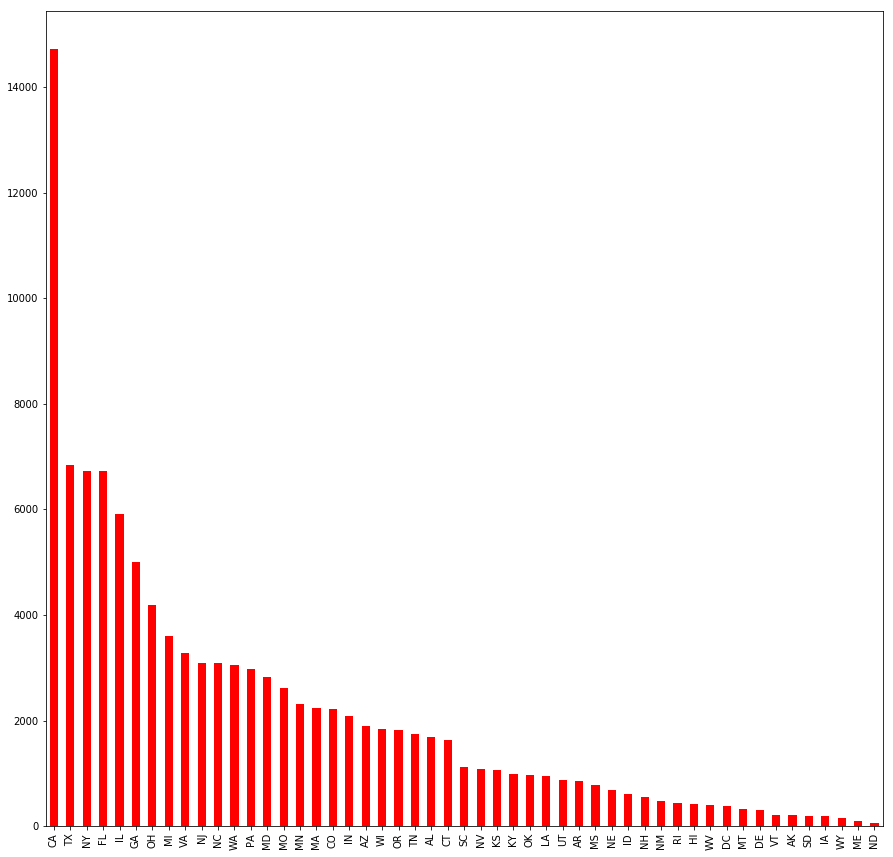

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [307]:
plt.figure(figsize=(15,15))
plt.figure(1)
df1['BorrowerState'].value_counts().plot(kind='bar',color='red')
plt.figure(2)
plt.figure(figsize=(15,15))

state_percentages=pd.DataFrame((100*df1['BorrowerState'].value_counts()/df1['BorrowerState'].count()))
state_percentages




> From the above Bar Plot we know that California has the highest number of borrowers accounting for approximately 14% of all borrowers in the U.S followed by Texas, new York and Florida with approximately 6% each. We would further like to analyze if any state has relatively higher number of defaulters than others. We would also like to discover state's share of the monetary amount borrowed.

> ## Purposes for Borrowing

Text(0, 0.5, 'Purpose')

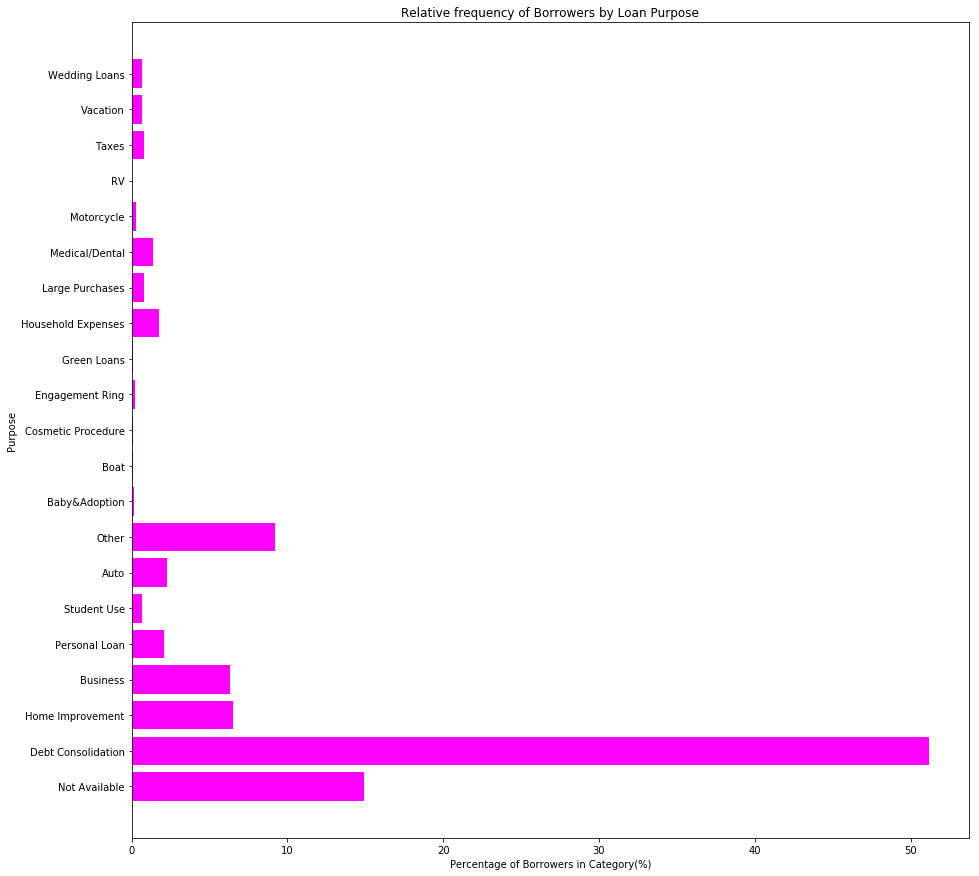

In [506]:
plt.figure(figsize=(15,15))

labels={ 0:'Not Available',1: 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

# assigning counts to each category

df1=df1.sort_values('ListingCategory (numeric)')
count = np.zeros(21)
for j in df1['ListingCategory (numeric)']:
    for i in np.arange(21):
        if i==j:
            count[j] = count[j] + 1

categories= [labels[i] for i in np.arange(21)] # creating list of categories

data={'category':categories,'counts':count} #dictionary of categories and counts
category_counts=pd.DataFrame(data=data,index=None) #creating dataframe of counts and categories

plt.barh(category_counts['category'],100*category_counts['counts']/df1['ListingCategory (numeric)'].count(),color='magenta') #Bar chart of counts in each category
plt.title('Relative frequency of Borrowers by Loan Purpose')
plt.xlabel('Percentage of Borrowers in Category(%)')
plt.ylabel('Purpose')

> The above Bar Plot tells us that Approximately 53% of borrowers are borrowing for Loan consolidation. This seems to be the primary purpose for Prosper Loans. Purpose of the loan is not available for 15% of the people. The other popular categories are Business and Home Improvement.

> ## Distribution of Professions

Text(0.5, 1.0, 'Distribution of Professions')

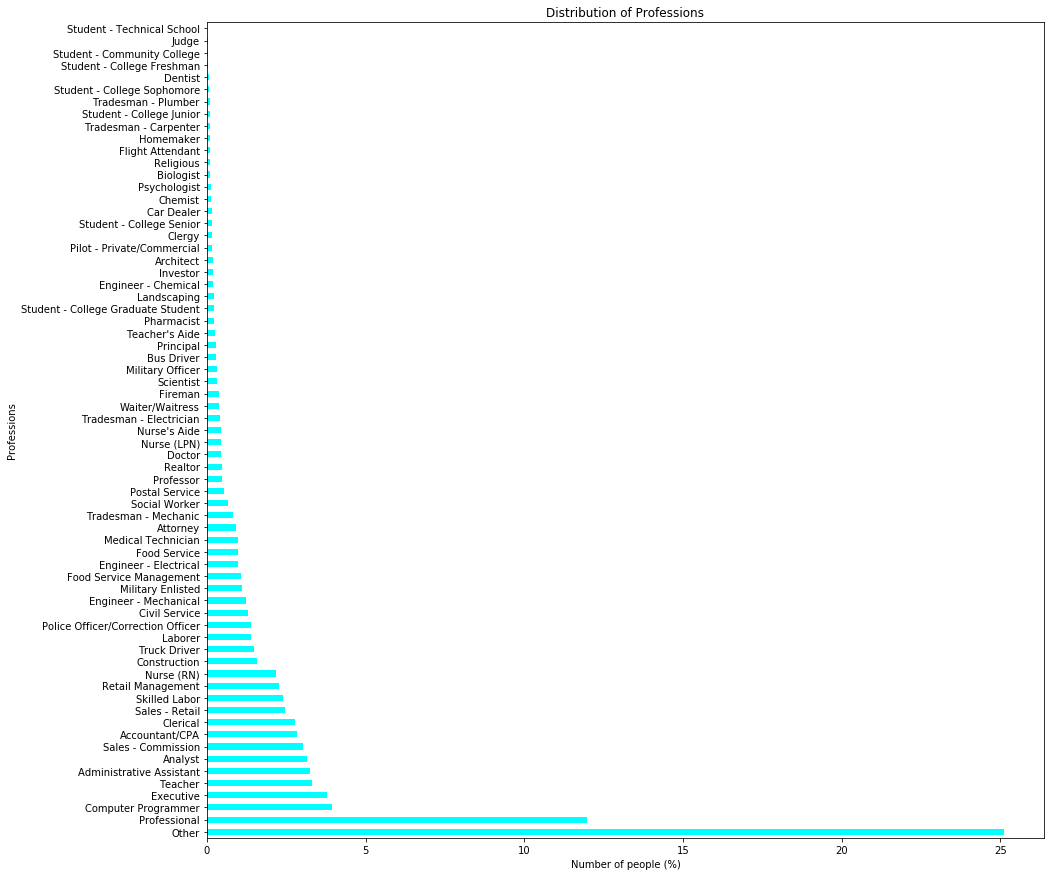

In [511]:
plt.figure(figsize=(15,15))
(100*df1['Occupation'].value_counts()/df1['ListingCategory (numeric)'].count()).plot(kind='barh',color='cyan') # Plotting barplot
plt.xlabel('Number of people (%)')
plt.ylabel('Professions')
plt.title('Distribution of Professions')

> Almost 1/4th of the people belong to the "Other" category. Among the known Categories, Professionals constitute 12% followed by Computer Progammers. We can further analyze the Incomes, Borrower rates and other metrics by profession.

> ## Stated Monthly Income Distribution

Interquartile Range : 3624.666667
Upper Bound : 12262.0000005
Lower Bound : 0.0


Text(0.5, 1.0, 'Monthly Income Distribution')

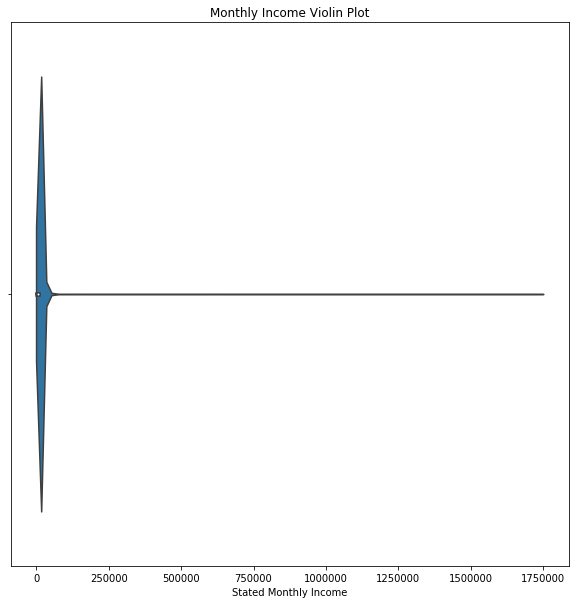

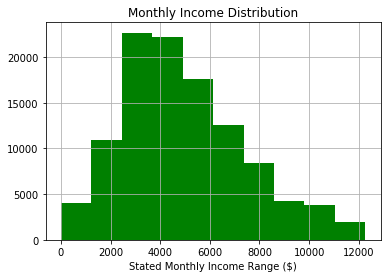

In [516]:
plt.figure(figsize=(10,10))

plt.figure(1)
sns.violinplot(x=df1['StatedMonthlyIncome'])
plt.xlabel('Stated Monthly Income')
plt.title('Monthly Income Violin Plot')

df1['StatedMonthlyIncome'].quantile([0.25,0.5,0.75])#calculating boxplot values
IQR=(df1['StatedMonthlyIncome'].quantile(0.75)-df1['StatedMonthlyIncome'].quantile(0.25))#claculating IQR
ub=df1['StatedMonthlyIncome'].quantile(0.75)+1.5*IQR #upperbound of boxplot
lb=max(df1['StatedMonthlyIncome'].quantile(0.25)-1.5*IQR,df1['StatedMonthlyIncome'].min())# lowerbound of boxplot
print('Interquartile Range :',IQR)
print('Upper Bound :',ub)
print('Lower Bound :',lb)

plt.figure(2)
df1['StatedMonthlyIncome'].hist(range=[lb,ub],color='green') #histogram with limited range
plt.xlabel('Stated Monthly Income Range ($)')
plt.title('Monthly Income Distribution')

> The Monthly Income has a lot of outliers as shown by the above violin plot. Thus we calculate the interquartile range and take the upper limit to be 1.5 times the interquartile range. We then plot the histogram distribution of that range. The distribtion is right skewed with the highest frequency in the $ 2200 - $ 5000 range. We can further inspect relationship between income and Borrower rate.

> ## Interest rate distribution

Text(0.5, 1.0, 'APR Rate Distribution')

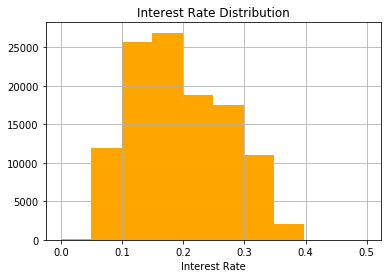

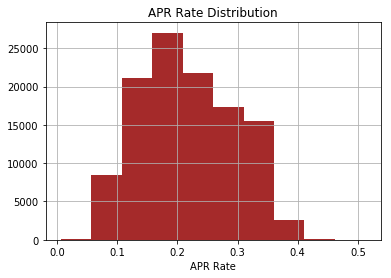

In [515]:
#Interest rate distribution
plt.figure(1)
df1['BorrowerRate'].hist(color='orange')
plt.xlabel('Interest Rate')
plt.title('Interest Rate Distribution')

#APR distribution
plt.figure(2)
df1['BorrowerAPR'].hist(color='brown')
plt.xlabel('APR Rate')
plt.title('APR Rate Distribution')

> Most people belong in the range of 20%.

> ## Debt to Income Ratio Distribution

First quartile : 0.14
Third quartile : 0.32


Text(0, 0.5, 'Number of Borrowers')

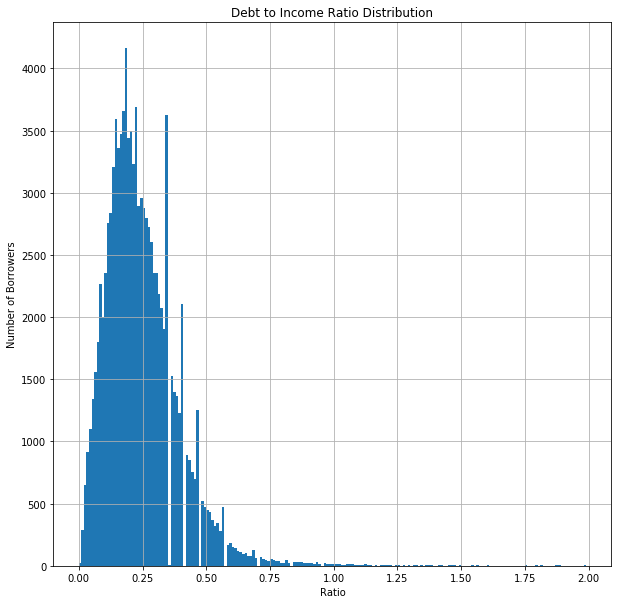

In [523]:

plt.figure(figsize=(10,10))
print('First quartile :',df1['DebtToIncomeRatio'].quantile(0.25)) #First Quartile
print('Third quartile :',df1['DebtToIncomeRatio'].quantile(0.75)) #Second Quartile
df1['DebtToIncomeRatio'].hist(bins=np.arange(0,2,0.01))
plt.title('Debt to Income Ratio Distribution')
plt.xlabel('Ratio')
plt.ylabel('Number of Borrowers')

> The Debt to Income Ratio distribution is also right skewed. Most people lie below 0.5. 50% of the people lie between 0.14 and 0.32. This is a reasonable figure, as it indicates a relatively low debt compared to income. We can see there are quite a few people above 1. This distribution can be used as an indicator for the health of an economy.

> ## Loan Status Distribution

Text(0, 0.5, 'Frequency')

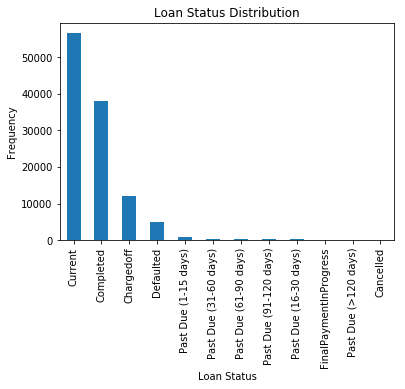

In [524]:
df1['LoanStatus'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')

> The above Bar Chart shows that most loans are current (around 50%). This plot also tells us that there are'nt many defaulters. They are about 5% of the popoulation. Further analysis needs to be done for this Defaulter population.

> ## Upper Credit Range Distribution

Text(0, 0.5, 'Frequency')

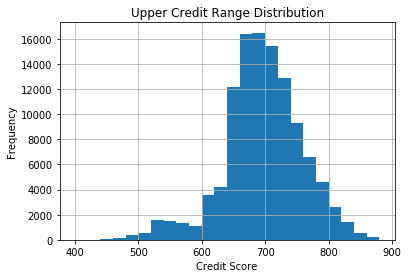

In [525]:
df1['CreditScoreRangeUpper'].hist(bins=np.arange(400,900,20))
plt.title('Upper Credit Range Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

> The above distribution of credit scores shows that a score of 650-750 includes most of the population. Further relationship can be explored between credit score and borrower's interest rate.

> ## Current Delinquencies

Number of current Deliquencies 23498


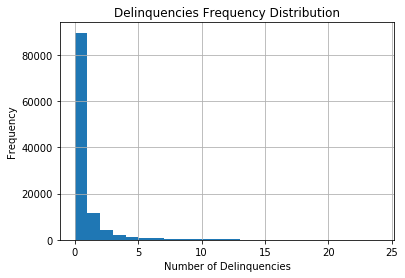

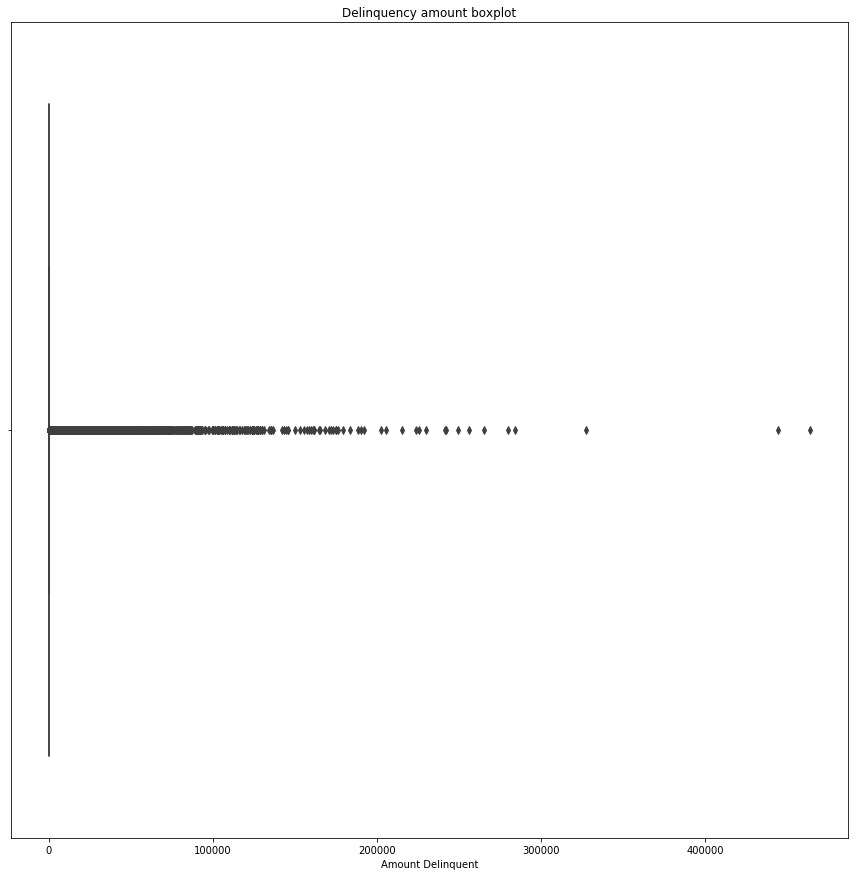

In [529]:
#Current Delinquencies, Amount Delinquent
plt.figure(1)
df1['CurrentDelinquencies'].hist(bins=np.arange(0,25,1)) # Histogram for delinquency distribution.
plt.title('Delinquencies Frequency Distribution')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Frequency')

plt.figure(figsize=(15,15))
sns.boxplot(df1['AmountDelinquent']) #Boxplot to determine outliers in delinquency amount
plt.title('Delinquency amount boxplot')
plt.xlabel('Amount Delinquent')\


print('Number of current Deliquencies',(df1['CurrentDelinquencies']>0).sum()) #Number of Delinquencies

> We can know from the histogram that there arent many delinquencies. They are only about 10000 which is approximately 10% of the population. The amount delinquent, however has a lot of outliers. This tells us that there are few delinquencies, but those that are delinquent vary greatly in terms of the amount. It can vary from few hundreds to $60000.

## Bivariate Exploration

> We explore interrelationships and correlations between two variables in this section. 

> ## Loan Amounts by State

Text(0.5, 1.0, 'Total Borrowing by State')

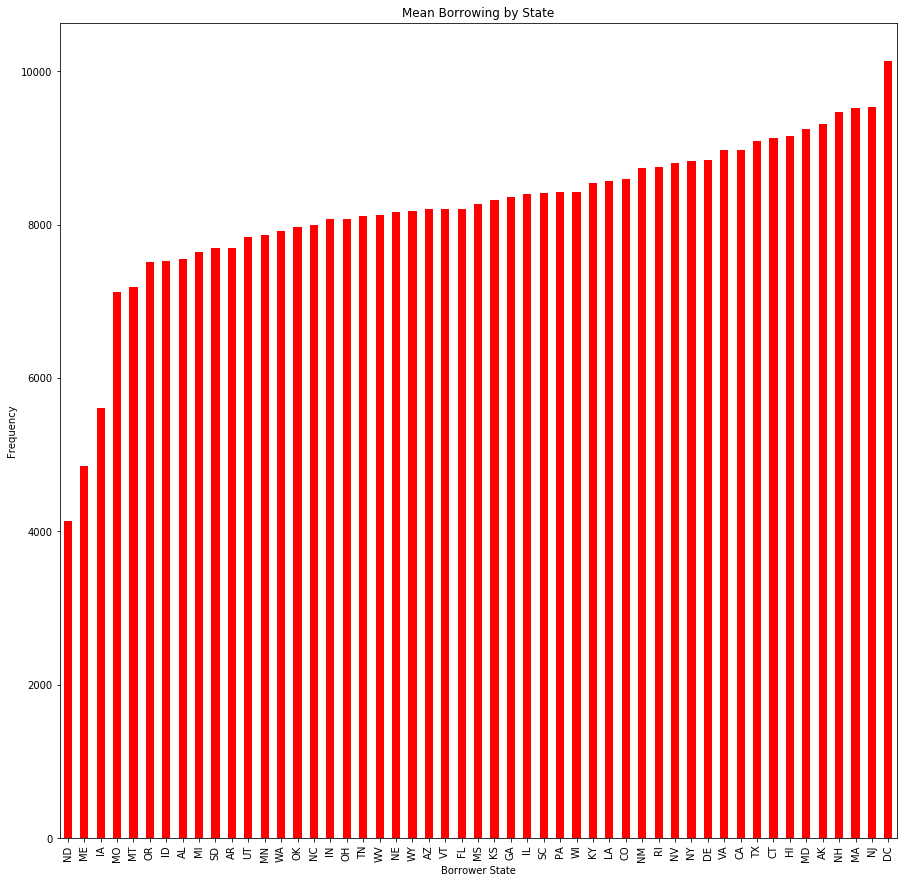

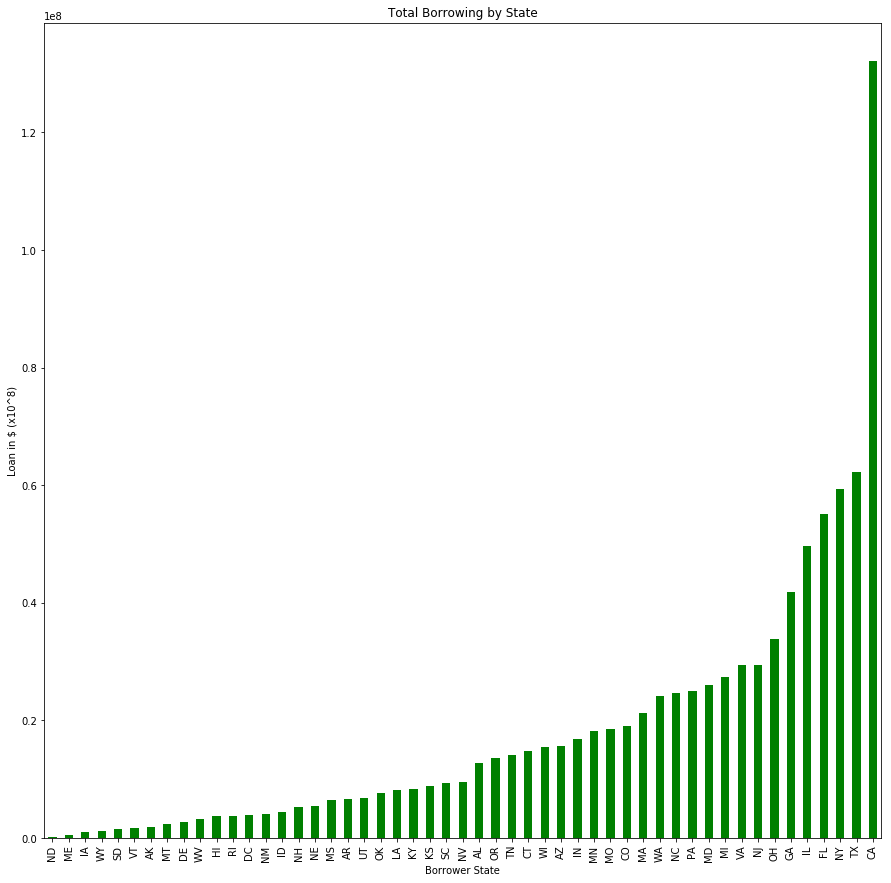

In [533]:
plt.figure(figsize=(15,15))
# grouping dataset by state and plotting barchart of Mean Loan Amount
df1.groupby(['BorrowerState'])['LoanOriginalAmount'].mean().sort_values().plot(kind='bar',color='red')
plt.xlabel('Borrower State')
plt.ylabel('Frequency')
plt.title('Mean Borrowing by State')

plt.figure(figsize=(15,15))
#plotting bar chart of total borrowings by each state
df1.groupby(['BorrowerState'])['LoanOriginalAmount'].sum().sort_values().plot(kind='bar',color='green')
plt.xlabel('Borrower State')
plt.ylabel('Loan in $ (x10^8)')
plt.title('Total Borrowing by State')

> We can see from the above plots that the state with the highest total borrowing is California while state with the highest mean borrowing is DC. This gives us the insight that borrowers from DC tend to borrow higher amount of money whereas the borrowers from California are large in number and take out smaller loans. This kind of analysis can be applied to all states to analyze borrower behavior.

> ## Upper Credit Score vs Borrower rate

Text(0, 0.5, 'Interest rate')

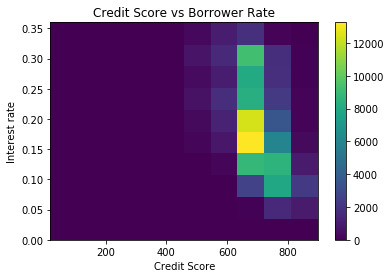

In [534]:
plt.figure(1)
crs1=df1.loc[df1['CreditScoreRangeUpper'].notnull()] # creating dataset of non-blank credit score upper range values

plt.hist2d(data=crs1,x=crs1['CreditScoreRangeUpper'],y=crs1['BorrowerRate']) #plotting histogram of credit score vs Borrower Rate
plt.colorbar()
plt.title('Credit Score vs Borrower Rate')
plt.xlabel('Credit Score')
plt.ylabel('Interest rate')

> Due to high overlapping of points in this particular feature data, a scatter plot is not feasible. Instead the heamap above was used. Here we can conclude that most people lie in the range of 600-700 and have an interest rate of 15%.  However we see that Borrower rate is not affected by Credit score alone, as there are many others in the heatmap with interest rates ranging from 20%-30% and still in the same credit score range of 600-700. We have to further analyze the relationship between interest rate and other features.

> ## Debt to Income Ratio vs Borrower Rate

Text(0, 0.5, 'Borrower Rate')

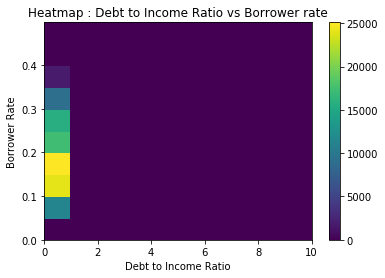

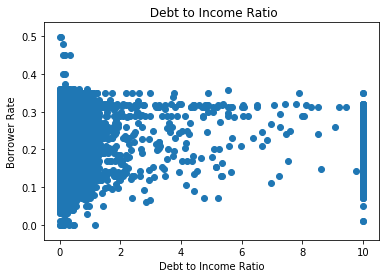

In [535]:
#DebtToIncome vs BorrowerRate
plt.figure(1)

dti=df1[df1['DebtToIncomeRatio'].notnull()] # creating dataset of non-blank Debt to Income ratio values
plt.hist2d(data=dti,x=dti['DebtToIncomeRatio'],y=dti['BorrowerRate']) #heatmap of Debt to Income ratio vs Borrower rate
plt.colorbar()
plt.title('Heatmap : Debt to Income Ratio vs Borrower rate')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrower Rate')

plt.figure(2)
plt.scatter(dti['DebtToIncomeRatio'],dti['BorrowerRate']) #scatter plot showing overlapping
plt.title(' Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrower Rate')

> Most people lie in the range of 10% - 20% and a Debt to Inome ratio of 0-1. This plot does not provide much insight, but was worth looking at.

> ## Number of Borrowers by Year

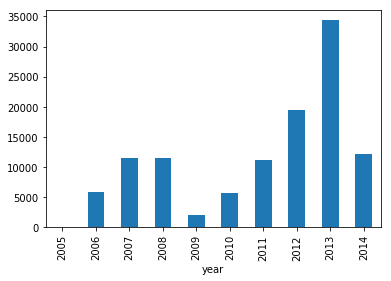

In [537]:
dt=pd.to_datetime(df1['LoanOriginationDate']) # converting column to datetime format to extract year from it
year=[date.year for date in dt] #creating list of years
df1['year']=year #creating column in df1 for year/

df1.groupby('year').ListingNumber.count().plot(kind='bar')  #bar chart for borrowers by year


> We see a general trend of increase in borrowers from 2006-2008, 2009-2013. Then there are dips in 2009 from 2008 and 2014 from 2013. The 2009 dip may be attributed to the financial crisis of 2008. However we need other data to verify this. the year 2013 has been the year with most borrowers.

## Multivariate Exploration

> ## Borrower Rate in Defaults vs Non Defaults for different Employment Status

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Borrower Rate in Defaults vs Non Defaults for different Employment Status')

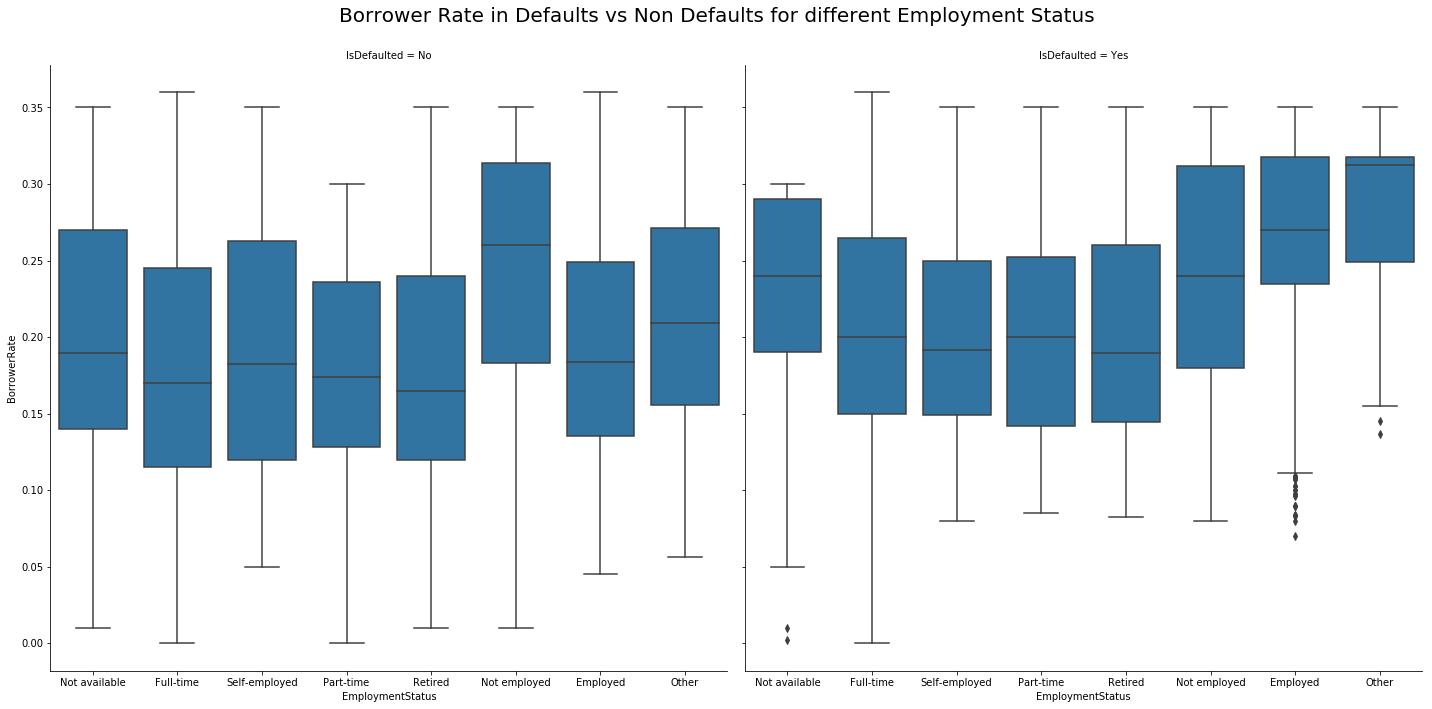

In [540]:
# creating new binary indicator variable for defaulters and no defaulters
isdefaulted=[]
for status in df1['LoanStatus']:
    if status=='Defaulted':
        isdefaulted.append('Yes')
    else :
        isdefaulted.append('No')

df1['IsDefaulted']=isdefaulted #inserting the indicator column into Dataframe
      
g = sns.FacetGrid(data = df1, col = 'IsDefaulted', size = 10)
g.map(sns.boxplot, 'EmploymentStatus', 'BorrowerRate')    
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Borrower Rate in Defaults vs Non Defaults for different Employment Status',size=20)

> We can see the general trend that median borrower rates are higher for defaults than non defaults across categories. But the amount by which the rate differs between defaults and non defaults among categories varies. For example we can see that among self employed people, the median interest rates are not too different from each other whereas among employed, the difference is pronounced. Another general trend here is that the whisker length in Defaults is lower than whisker length in Non Defaults.

> ## Prosper Score in Defaults vs Non Defaults for different Employment Status

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Prosper Score in Defaults vs Non Defaults for different Employment Status')

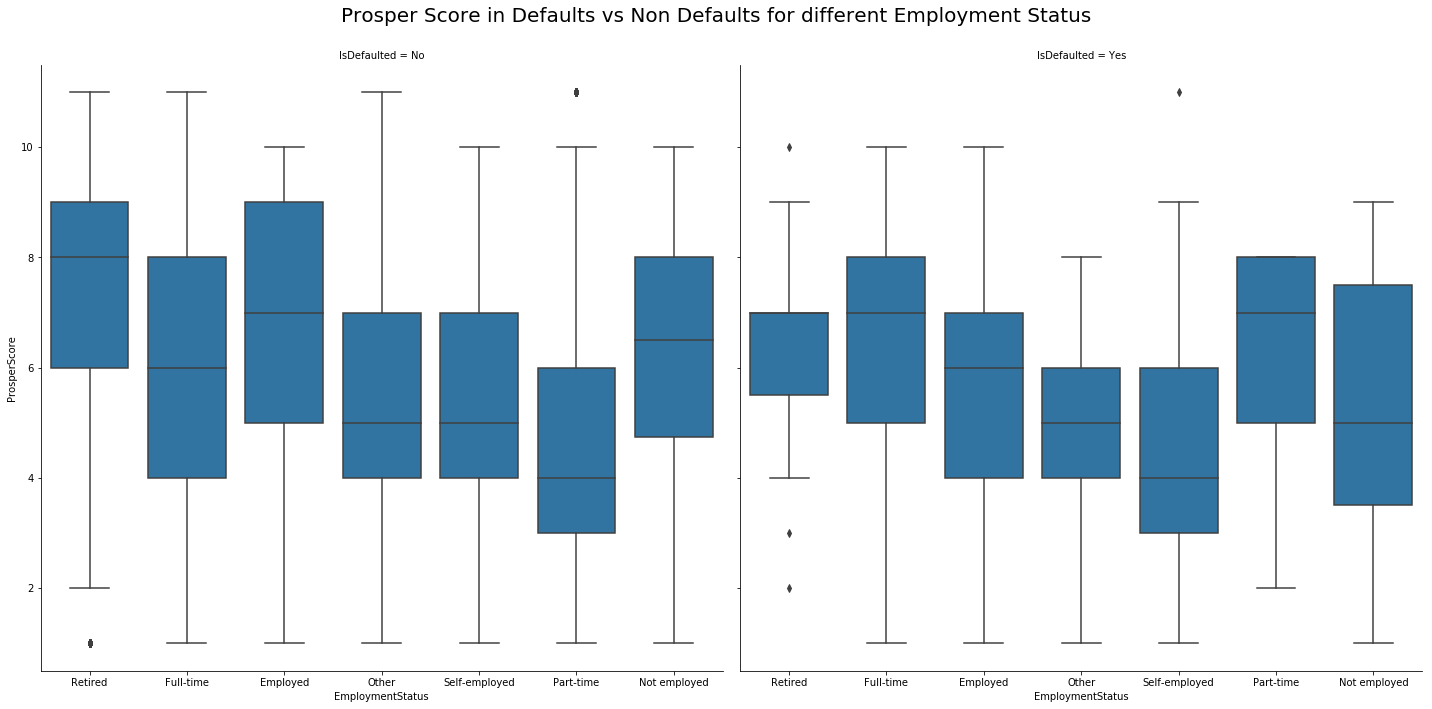

In [542]:
g = sns.FacetGrid(data = df1, col = 'IsDefaulted', size = 10)
g.map(sns.boxplot, 'EmploymentStatus', 'ProsperScore')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Prosper Score in Defaults vs Non Defaults for different Employment Status',size=20)


> We can determine the effectiveness of the prosper score (which represents risk factor) in predicting the possibility of defaulting among different work status. If we assume that the difference in median Prosperscore between defaults and non defaults in their respective employment categories as the goodness of prediction, then the predictive abilities of the prosper score among 'other' employment status constituents is bad because this difference is almost zero. Vice versa, in the case of part time employees, the difference in prosper score between defaulters and non defaulters is quite high, hence the predictive ability of prosperscore in this category is quite good. Similar comparisions can be done on all categories of employees.

> ## Insights

> The main insights we got from the multivariate analysis are that the median borrower rates among defaults are higher than non defaults and that the prosper score is good at predicting defaults among some employment categories such as part time employees and bad for some categories like self employed borrowers.

